In [14]:
import pandas as pd 
df = pd.read_csv('inegalites_2020_all_v7.csv', encoding= "utf-8-sig",index_col='CODGEO',
                               dtype = {'CODGEO' : 'str'})


In [15]:
df= df.drop(['Ecart H/F études supérieures', 'Ecart H/F temps partiels',  'Ecart H/F actifs occupés',  'Ecart H/F Salaire net moyen', 'groupe'], axis=1)      
      

In [17]:
cols = ['SNHMC20', 'SNHMP20', 'SNHME20', 'SNHMO20', 'SNHM1820', 'SNHM2620',
       'SNHM5020', 'chomeur_1564', 'actif_occ_temps_plein_15plus',
       'actif_occ_temps_partiel_15plus', 'inactif_1564', 'inactif_65plus',
       'D120H', 'D920H', 'ets_total', 'ets_industrie_p',
       'ets_impact_local_p', 'ets_taille50p_p', 'ets_creation_p',
       'R_P19_POP1529', 'R_P19_POP3044', 'R_P19_POP4559', 'R_P19_POP6074',
       'R_P19_POP7589', 'R_C19_MENPSEUL', 'R_C19_MENCOUPSENF',
       'R_C19_MENCOUPAENF', 'R_C19_MENFAMMONO']

In [18]:
feats = df.drop('MED20H', axis=1)
target = df.MED20H

In [19]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scaled_df = sc.fit_transform(feats)
scaled_df = pd.DataFrame(scaled_df, columns=cols)

In [20]:
#Utilisation de la médiane pour l'encodage de target en deux étiquettes (pauvre/riche)
target.median()

12.0989010989011

In [21]:
def encodage(x): 
    if x <= 12.09:
        return 'Pauvre'
    if x> 12.09:
        return 'Riche'
target = target.apply(encodage)

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(feats, target, test_size = 0.30, random_state=42)

import matplotlib.pyplot as plt 
from sklearn.ensemble import RandomForestClassifier

feature_names = X_train.columns
forest = RandomForestClassifier(random_state=42)
forest.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

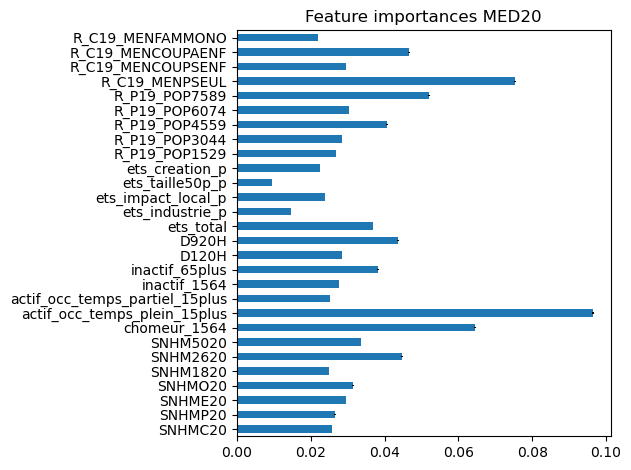

In [23]:
import numpy as np
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.barh(yerr=std, ax=ax)
ax.set_title("Feature importances MED20")

fig.tight_layout()

In [24]:
from scipy.stats import pearsonr

test_corr = pd.DataFrame(index=df.columns)
test_corr['coeff']=0
test_corr['pvalue %']=0
for i in df.columns:
    test_corr.loc[i,'coeff'], test_corr.loc[i,'pvalue %'] = pearsonr(df[i],df['MED20H'])

test_corr['coeff'] = round(test_corr['coeff'],2)
test_corr['pvalue %'] = round(test_corr['pvalue %']*100,2)

test_corr.sort_values(by = 'coeff', ascending = False)


,coeff,pvalue %
MED20H,1.00,0.00
actif_occ_temps_plein_15plus,0.44,0.00
D920H,0.41,0.00
SNHM2620,0.41,0.00
SNHM5020,0.38,0.00
SNHME20,0.37,0.00
R_C19_MENCOUPAENF,0.33,0.00
SNHMC20,0.33,0.00
SNHMO20,0.30,0.00
SNHMP20,0.30,0.00
